# Analyze Kaggle Goodreads-books dataset
1. Explore
2. Clean 
3. Feature Engineer the columns
4. Build a Linear Regression model
5. Evaluate the model
6. Predict test cases
7. Deploy a new test case

In [1]:
#All imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
#Load the csv file as Pandas dataframe and check its shape
#Note the warning below: The data contains few erroneous rows that have extra values in its 11th column;
#read_csv function skips these erroneous cases from our dataframe df.
#The original csv file
df = pd.read_csv("books.csv",  error_bad_lines = False)
print("The data contains {0} Rows and {1} Columns".format(df.shape[0],df.shape[1]))

The data contains 13714 Rows and 10 Columns


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [5]:
#Let's look at the first 5 rows of the data
#We do see the 10 column names and clearly J.K. Rowling's Harry Potter books...yaay :-)!
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


## 1. Books that received more ratings (Top 10)

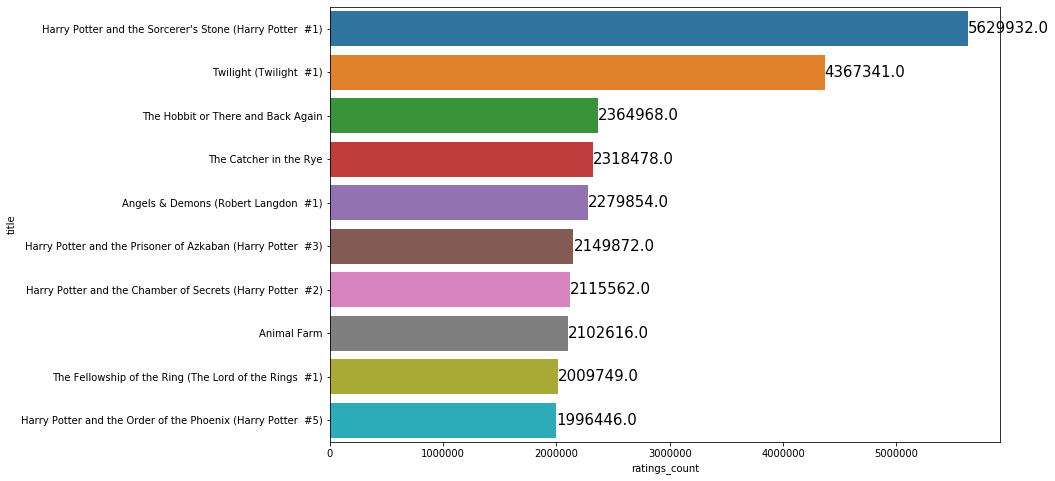

In [6]:
# Let's look at the top 10 rated books
top10Books = df.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
plot_dims = (12, 8)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(top10Books, top10Books.index)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
plt.show()

## 2. Books categorized based on languages (Top 7)

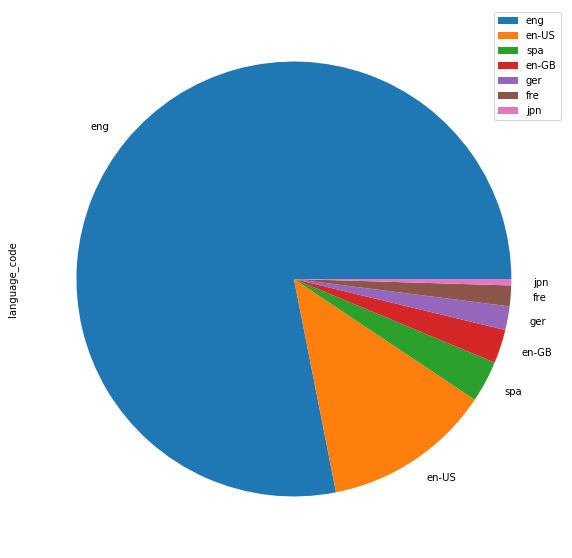

In [7]:
df['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(10, 10)).legend()
plt.show()

In [8]:
df_index_ChosenLangs = df.loc[df['language_code'].isin(['eng','en-US', 'spa', 'fre'])] 
df_index_ChosenLangs.shape
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


## 3. Split data into two sets based on ratings count and chosen languages ['eng','en-US', 'spa', 'fre']. 
1. Assume high ratings as ratings >= 100,000
2. 'ratings_count' - Drop ratings below 100, 000

In [9]:
High_Rating = 100000
df_HighRatedBooks = df_index_ChosenLangs.drop(df_index_ChosenLangs.index[df_index_ChosenLangs['ratings_count'] <= High_Rating])

In [10]:
df_HighRatedBooks.shape

(454, 10)

In [11]:
df_HighRatedBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,0345453743,9780345453747,eng,815,240189,3954


In [12]:
df_OtherBooks = df_index_ChosenLangs.drop(df_index_ChosenLangs.index[df_index_ChosenLangs['ratings_count'] > High_Rating])

In [13]:
df_OtherBooks.shape

(12467, 10)

In [14]:
df_OtherBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3602,258


## 4.  Encoding the Categorical variables for the two samples

### a. Encode the 'title'

#### Encoding samples in df_HighRatedBooks

In [15]:
# encode title column
labelEncode = preprocessing.LabelEncoder()
df_HighRatedBooks['title'] = labelEncode.fit_transform(df_HighRatedBooks['title'])
df_OtherBooks['title'] = labelEncode.fit_transform(df_OtherBooks['title'])

In [16]:
df_HighRatedBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,136,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,137,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,139,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,5,138,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
9,13,401,Douglas Adams,4.38,0345453743,9780345453747,eng,815,240189,3954


#### Encoding samples in df_OtherBooks

In [17]:
df_OtherBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
3,4,3379,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,8,3373,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,10820,W. Frederick Zimmerman,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,3375,J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,10187,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3602,258


### b. Encode the 'authors'

#### Encoding samples in df_HighRatedBooks

In [18]:
# encode authors column
df_HighRatedBooks['authors'] = labelEncode.fit_transform(df_HighRatedBooks['authors'])
df_HighRatedBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,136,119,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,137,119,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,139,119,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,5,138,119,4.55,043965548X,9780439655484,eng,435,2149872,33964
9,13,401,67,4.38,0345453743,9780345453747,eng,815,240189,3954


#### Encoding samples in df_OtherBooks

In [19]:
df_OtherBooks['authors'] = labelEncode.fit_transform(df_OtherBooks['authors'])
df_OtherBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
3,4,3379,2842,4.41,0439554896,9780439554893,eng,352,6267,272
5,8,3373,2845,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,10820,6814,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,3375,2842,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,10187,1582,4.38,0517226952,9780517226957,eng,815,3602,258


In [20]:
#df_OtherBooks = df_OtherBooks.loc[df['language_code'].isin(['eng','en-US', 'spa', 'fre'])] 

### b. Dummy encode the 'language_code'

#### Encoding samples in df_HighRatedBooks

In [21]:
encoded_lang_high = pd.get_dummies(df_HighRatedBooks['language_code'])
colsExist2 = df_HighRatedBooks.columns.isin(['en-US', 'eng', 'fre', 'spa']).any()
if  colsExist2 == False:
    df_HighRatedBooks = pd.concat([df_HighRatedBooks, encoded_lang_high], axis = 1)
print(df_HighRatedBooks.shape)
df_HighRatedBooks.head()

(454, 14)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,en-US,eng,fre,spa
0,1,136,119,4.56,0439785960,9780439785969,eng,652,1944099,26249,0,1,0,0
1,2,137,119,4.49,0439358078,9780439358071,eng,870,1996446,27613,0,1,0,0
2,3,139,119,4.47,0439554934,9780439554930,eng,320,5629932,70390,0,1,0,0
4,5,138,119,4.55,043965548X,9780439655484,eng,435,2149872,33964,0,1,0,0
9,13,401,67,4.38,0345453743,9780345453747,eng,815,240189,3954,0,1,0,0


#### Encoding samples in df_OtherBooks

In [22]:
encoded_lang_other = pd.get_dummies(df_OtherBooks['language_code'])
encoded_lang_other.head()
colsExist = df_OtherBooks.columns.isin(['en-US', 'eng', 'fre', 'spa']).any()
if  colsExist == False:
    df_OtherBooks = pd.concat([df_OtherBooks, encoded_lang_other], axis = 1)
print(df_OtherBooks.shape)
df_OtherBooks.head()

(12467, 14)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,en-US,eng,fre,spa
3,4,3379,2842,4.41,0439554896,9780439554893,eng,352,6267,272,0,1,0,0
5,8,3373,2845,4.78,0439682584,9780439682589,eng,2690,38872,154,0,1,0,0
6,9,10820,6814,3.69,0976540606,9780976540601,en-US,152,18,1,1,0,0,0
7,10,3375,2842,4.73,0439827604,9780439827607,eng,3342,27410,820,0,1,0,0
8,12,10187,1582,4.38,0517226952,9780517226957,eng,815,3602,258,0,1,0,0


## 5. Building a Linear Regression Model

In [34]:
def ModelBuilding_LinearRegression(df_Current, testSize=0.2):
    # divide the data into attributes and labels
    X = df_Current.drop(['average_rating', 'language_code', 'isbn'], axis = 1)
    y = df_Current['average_rating']
    print("Shape of Inputs = {0}".format(X.shape))
    print("Shape of Target = {0}".format(y.shape))
    # split 80% of the data to the training set and 20% of the data to test set 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = 999)
    linReg = LinearRegression()
    linReg.fit(X_train, y_train)
    print("Intercept = {0}".format(linReg.intercept_))
    print("Coefficients = {0}".format(linReg.coef_.tolist()))
    predictions = linReg.predict(X_test)
    return (predictions, X_test, y_test, linReg)

### a. Model Intercept, coefficients and "average_rating" predictions for Highly rated books

In [35]:
Pedicted_Scores, X_test, y_test, linReg = ModelBuilding_LinearRegression(df_HighRatedBooks)

Shape of Inputs = (454, 11)
Shape of Target = (454,)
Intercept = -23.822693096514964
Coefficients = [1.2167641836809623e-06, -7.105512967539281e-05, -0.00027870774337357635, 2.8311522053902245e-12, 0.0001953985832732448, 5.7984528226863595e-08, -1.3905380466673851e-06, 0.10478836561401067, 0.11056485334229431, -0.13248573914300737, -0.0828674798132964]


In [36]:
Actual_Predicted = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': Pedicted_Scores.tolist()})
Actual_Predicted['diff'] = Actual_Predicted['Observed'] - Actual_Predicted['Predicted']
Actual_Predicted.head(10)

,Observed,Predicted,diff
0,3.96,4.033805,-0.073805
1,3.99,3.990838,-0.000838
2,4.00,3.945433,0.054567
3,4.24,4.012508,0.227492
4,3.96,3.978972,-0.018972
5,4.03,3.993076,0.036924
6,4.15,4.049198,0.100802
7,3.97,4.018045,-0.048045
8,4.06,3.949395,0.110605
9,3.70,3.982329,-0.282329


### b. The model looks reasonable with Root Mean Square Error (RMSE) at around 0.22 and Mean Absolute Error (MAE)  around 0.17

In [37]:
# evaluate the performance of the algorithm
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))
print('Mean Absolute Error (MAE):', np.sum(abs(Actual_Predicted['diff']))/Actual_Predicted.shape[0])

Mean Absolute Error (MAE): 0.17002729802052693
Mean Squared Error (MSE): 0.04685604930505821
Root Mean Squared Error (RMSE): 0.21646258176659128
Mean Absolute Error (MAE): 0.17002729802052693


In [38]:
X_test.head()

,bookID,title,authors,isbn13,# num_pages,ratings_count,text_reviews_count,en-US,eng,fre,spa
9581,30868,282,27,9780812474947,232,117003,5141,0,1,0,0
12250,41899,105,223,9780439321600,128,240268,5219,0,1,0,0
2222,6689,157,249,9780375814242,146,309497,4481,0,1,0,0
2684,8127,46,181,9780451528827,320,583568,12837,0,1,0,0
1165,3478,195,225,9780446676076,342,197377,3431,0,1,0,0


### c. Testing a mocked up case for deployment (prediction accuracy seems very close for this case, around 0.99)

In [39]:
Mocked_Case = np.array([33333, 888, 27, 9780812474947, 232, 117003, 5141, 0, 1, 0, 0])

In [40]:
Score_Mocked_Case = linReg.predict(Mocked_Case.reshape(1, -1))

In [41]:
Predictions = pd.DataFrame({'Observed': y_test.iloc[0], 'Predicted': Score_Mocked_Case})
Predictions

,Observed,Predicted
0,3.96,3.993745


In [42]:
X2 = df_OtherBooks.drop(['average_rating', 'language_code', 'isbn'], axis = 1)
y2 = df_OtherBooks['average_rating']
print(X2.shape)
print(y2.shape)

(12467, 11)
(12467,)


In [43]:
Scores2 = linReg.predict(X2)

In [44]:
DeployedModelPredictions = pd.DataFrame({'Observed': y2.tolist(), 'Predicted': Scores2.tolist()})
DeployedModelPredictions['diff'] = DeployedModelPredictions['Observed'] - DeployedModelPredictions['Predicted']
DeployedModelPredictions.head(10)

,Observed,Predicted,diff
0,4.41,3.014372,1.395628
1,4.78,3.472864,1.307136
2,3.69,1.335309,2.354691
3,4.73,3.599370,1.130630
4,4.38,2.972365,1.407635
5,4.22,2.964404,1.255596
6,4.22,2.920613,1.299387
7,4.38,2.966712,1.413288
8,3.43,3.727401,-0.297401
9,3.88,3.748680,0.131320


### d. The model built for df_HighRatedBooks performs worse on df_OtherBooks with a Mean Absolute Error (MAE)  1.3479

In [45]:
print('Mean Absolute Error (MAE):', np.sum(abs(DeployedModelPredictions['diff']))/DeployedModelPredictions.shape[0])

Mean Absolute Error (MAE): 1.3479399821037128


### e. Model Intercept, coefficients and "average_rating" predictions for Other books not highly rated (i.e. with ratings < 100,000)

In [48]:
Pedicted_Scores, X_test, y_test, linReg = ModelBuilding_LinearRegression(df_OtherBooks)

Shape of Inputs = (12467, 11)
Shape of Target = (12467,)
Intercept = 3.858845882120251
Coefficients = [-9.109819086157286e-07, 1.4642805138711e-06, 1.0441401803473114e-06, 7.208195917347276e-16, 0.00022798845634429665, 3.769067319315205e-06, -7.285469375941278e-05, -0.0160662640622334, -0.013023909263107342, 0.04162899380999324, -0.0125388204846529]


In [49]:
Actual_Predicted = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': Pedicted_Scores.tolist()})
Actual_Predicted['diff'] = Actual_Predicted['Observed'] - Actual_Predicted['Predicted']
Actual_Predicted.head(10)

,Observed,Predicted,diff
0,4.29,3.883288,0.406712
1,4.23,3.819300,0.410700
2,3.27,3.954950,-0.684950
3,3.99,3.919310,0.070690
4,3.83,3.922710,-0.092710
5,3.66,3.913309,-0.253309
6,3.64,3.914832,-0.274832
7,3.74,3.918488,-0.178488
8,4.06,3.823783,0.236217
9,3.92,3.896491,0.023509


### f. The second model performs way better with Root Mean Square Error (RMSE) at around 0.35 and Mean Absolute Error (MAE)  around 0.23 for other books not rated high

In [52]:
# evaluate the performance of the algorithm
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))

Mean Absolute Error (MAE): 0.23703659798313312
Mean Squared Error (MSE): 0.12525398411955324
Root Mean Squared Error (RMSE): 0.35391239610891456
